NVIDIA Businness analysis

In [ ]:
# BLOC : IMPORTATIONS
import pandas as pd # to do dataframes
import numpy as np # to do calculations
import yfinance as yf # for financial informations
import matplotlib.pyplot as plt # plots ... ggplot2
import seaborn as sns # visualisations

# More and more NLP is used
from wordcloud import WordCloud # just to take a subset of the library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Printing the context / statement
print("Corporate Strategy")
print("Overview of NVIDIA")

Corporate Strategy
Overview of NVIDIA


ERROR:yfinance:$NVIDIA.PA: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
<ipython-input-3-2a40bf6e21b7>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2019-01-01", periods=60, freq='M')


Using sample data as NVIDIA stock data may not be public.


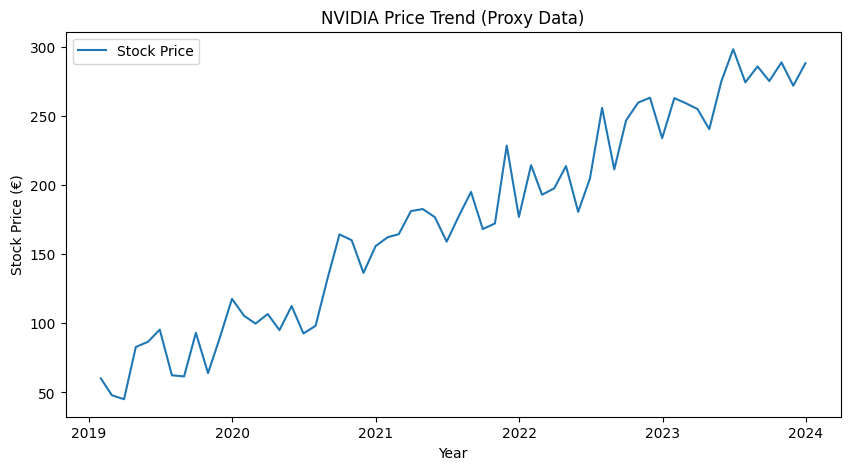

In [3]:
# Financial analysis
try:
  NVIDIA_stock = yf.Ticker("NVIDIA.PA")
  NVIDIA_hist = NVIDIA_stock.history(period="5y")
  if NVIDIA_hist.empty:
    raise ValueError("Data empty")

except :
  print("Using sample data as NVIDIA stock data may not be public.")
  dates = pd.date_range(start="2019-01-01", periods=60, freq='M')
  prices = np.linspace(50,300,60) + np.random.normal(0,20,60)
  NVIDIA_hist = pd.DataFrame({"Date": dates, "Close":prices}).set_index("Date")

# Plot stock trends
plt.figure(figsize=(10,5))
sns.lineplot(data=NVIDIA_hist, x=NVIDIA_hist.index, y="Close", label="Stock Price")
plt.title("NVIDIA Price Trend (Proxy Data)")
plt.xlabel("Year")
plt.ylabel("Stock Price (€)")
plt.legend()
plt.show()

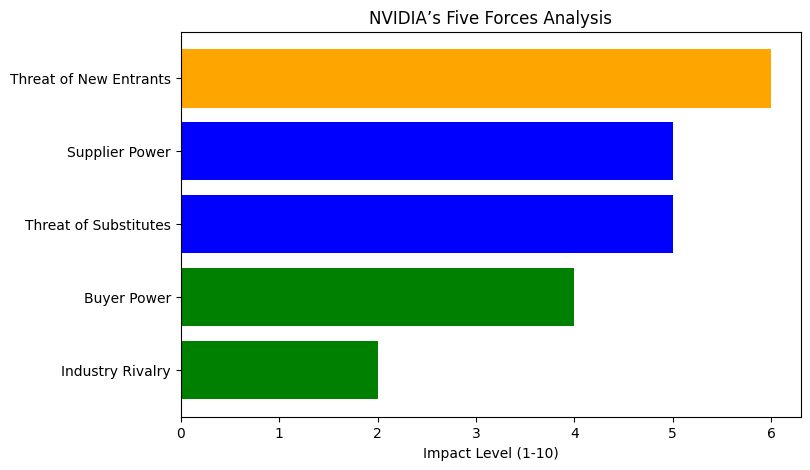

In [8]:
import matplotlib.pyplot as plt

# Données des forces concurrentielles
forces = {
    "Supplier Power": 5,
    "Buyer Power": 4,
    "Industry Rivalry": 2,
    "Threat of Substitutes": 5,
    "Threat of New Entrants": 6
}

# Trier les forces par valeur décroissante
sorted_forces = dict(sorted(forces.items(), key=lambda item: item[1], reverse=True))

# Définir les couleurs en fonction des valeurs
colors = ["green" if value < 5 else "blue" if value == 5 else "orange" for value in sorted_forces.values()]

# Création du graphique en barres horizontales
plt.figure(figsize=(8, 5))
bars = plt.barh(list(sorted_forces.keys()), list(sorted_forces.values()), color=colors)

# Ajout des labels et du titre
plt.xlabel("Impact Level (1-10)")
plt.title("NVIDIA’s Five Forces Analysis")
plt.gca().invert_yaxis()  # Inverser l'ordre des valeurs pour que le plus grand soit en haut

# Affichage du graphique
plt.show()


In [9]:
years = list(range(2024, 2031))
scenarios = {"Pessimistic": 0.02, "Neutral": 0.05, "Optimistic": 0.08}
initial_revenue = 40000  # in million €
cogs_ratio = 0.6
operating_expenses_growth = 0.03
depreciation_growth = 0.02
interest_expense = 500
tax_rate = 0.25
initial_operating_expenses = 5000
initial_depreciation = 2000

In [ ]:
data = {"Year": years}
for scenario, growth_rate in scenarios.items():
  revenue = [initial_revenue * (1 + growth_rate) ** (year - 2024) for year in years]
  cogs = [r * cogs_ratio for r in revenue]
  gross_profit = [r - c for r, c in zip(revenue, cogs)]
  operating_expenses = [initial_operating_expenses * (1 + operating_expenses_growth) ** (year - 2024) for year in years]
  ebitda = [gp - op for gp, op in zip(gross_profit, operating_expenses)]
  depreciation = [initial_depreciation * (1 + depreciation_growth) ** (year - 2024) for year in years]
  ebit = [e - d for e, d in zip(ebitda, depreciation)]
  ebt = [e - interest_expense for e in ebit]
  tax = [e * tax_rate for e in ebt]
  net_income = [e - t for e, t in zip(ebt, tax)]
  roi = [ni / r for ni, r in zip(net_income, revenue)]

In [ ]:
data[f"Revenue ({scenario}) (€M)"] = revenue
data[f"COGS ({scenario}) (€M)"] = cogs
data[f"Gross Profit ({scenario}) (€M)"] = gross_profit
data[f"Operating Expenses ({scenario}) (€M)"] = operating_expenses
data[f"EBITDA ({scenario}) (€M)"] = ebitda
data[f"Depreciation ({scenario}) (€M)"] = depreciation
data[f"EBIT ({scenario}) (€M)"] = ebit
data[f"EBT ({scenario}) (€M)"] = ebt
data[f"Tax ({scenario}) (€M)"] = tax
data[f"Net Income ({scenario}) (€M)"] = net_income
data[f"ROI ({scenario})"] = roi

In [ ]:
df = pd.DataFrame(data)
print(df)

   Year  Revenue (Optimistic) (€M)  COGS (Optimistic) (€M)  \
0  2024               40000.000000            24000.000000   
1  2025               43200.000000            25920.000000   
2  2026               46656.000000            27993.600000   
3  2027               50388.480000            30233.088000   
4  2028               54419.558400            32651.735040   
5  2029               58773.123072            35263.873843   
6  2030               63474.972918            38084.983751   

   Gross Profit (Optimistic) (€M)  Operating Expenses (Optimistic) (€M)  \
0                    16000.000000                           5000.000000   
1                    17280.000000                           5150.000000   
2                    18662.400000                           5304.500000   
3                    20155.392000                           5463.635000   
4                    21767.823360                           5627.544050   
5                    23509.249229                    

In [ ]:
df

,Year,Revenue (Optimistic) (€M),COGS (Optimistic) (€M),Gross Profit (Optimistic) (€M),Operating Expenses (Optimistic) (€M),EBITDA (Optimistic) (€M),Depreciation (Optimistic) (€M),EBIT (Optimistic) (€M),EBT (Optimistic) (€M),Tax (Optimistic) (€M),Net Income (Optimistic) (€M),ROI (Optimistic)
0,2024,40000.000000,24000.000000,16000.000000,5000.000000,11000.000000,2000.000000,9000.000000,8500.000000,2125.000000,6375.000000,0.159375
1,2025,43200.000000,25920.000000,17280.000000,5150.000000,12130.000000,2040.000000,10090.000000,9590.000000,2397.500000,7192.500000,0.166493
2,2026,46656.000000,27993.600000,18662.400000,5304.500000,13357.900000,2080.800000,11277.100000,10777.100000,2694.275000,8082.825000,0.173243
3,2027,50388.480000,30233.088000,20155.392000,5463.635000,14691.757000,2122.416000,12569.341000,12069.341000,3017.335250,9052.005750,0.179644
4,2028,54419.558400,32651.735040,21767.823360,5627.544050,16140.279310,2164.864320,13975.414990,13475.414990,3368.853748,10106.561243,0.185716
5,2029,58773.123072,35263.873843,23509.249229,5796.370372,17712.878857,2208.161606,15504.717251,15004.717251,3751.179313,11253.537938,0.191474
6,2030,63474.972918,38084.983751,25389.989167,5970.261483,19419.727684,2252.324839,17167.402846,16667.402846,4166.850711,12500.552134,0.196937


In [ ]:
df.describe()

,Year,Revenue (Optimistic) (€M),COGS (Optimistic) (€M),Gross Profit (Optimistic) (€M),Operating Expenses (Optimistic) (€M),EBITDA (Optimistic) (€M),Depreciation (Optimistic) (€M),EBIT (Optimistic) (€M),EBT (Optimistic) (€M),Tax (Optimistic) (€M),Net Income (Optimistic) (€M),ROI (Optimistic)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2027.000000,50987.447770,30592.468662,20394.979108,5473.187272,14921.791836,2124.080966,12797.710870,12297.710870,3074.427717,9223.283152,0.178983
std,2.160247,8454.022327,5072.413396,3381.608931,349.346760,3032.587782,90.848808,2941.875669,2941.875669,735.468917,2206.406752,0.013525
min,2024.000000,40000.000000,24000.000000,16000.000000,5000.000000,11000.000000,2000.000000,9000.000000,8500.000000,2125.000000,6375.000000,0.159375
25%,2025.500000,44928.000000,26956.800000,17971.200000,5227.250000,12743.950000,2060.400000,10683.550000,10183.550000,2545.887500,7637.662500,0.169868
50%,2027.000000,50388.480000,30233.088000,20155.392000,5463.635000,14691.757000,2122.416000,12569.341000,12069.341000,3017.335250,9052.005750,0.179644
75%,2028.500000,56596.340736,33957.804442,22638.536294,5711.957211,16926.579084,2186.512963,14740.066120,14240.066120,3560.016530,10680.049590,0.188595
max,2030.000000,63474.972918,38084.983751,25389.989167,5970.261483,19419.727684,2252.324839,17167.402846,16667.402846,4166.850711,12500.552134,0.196937


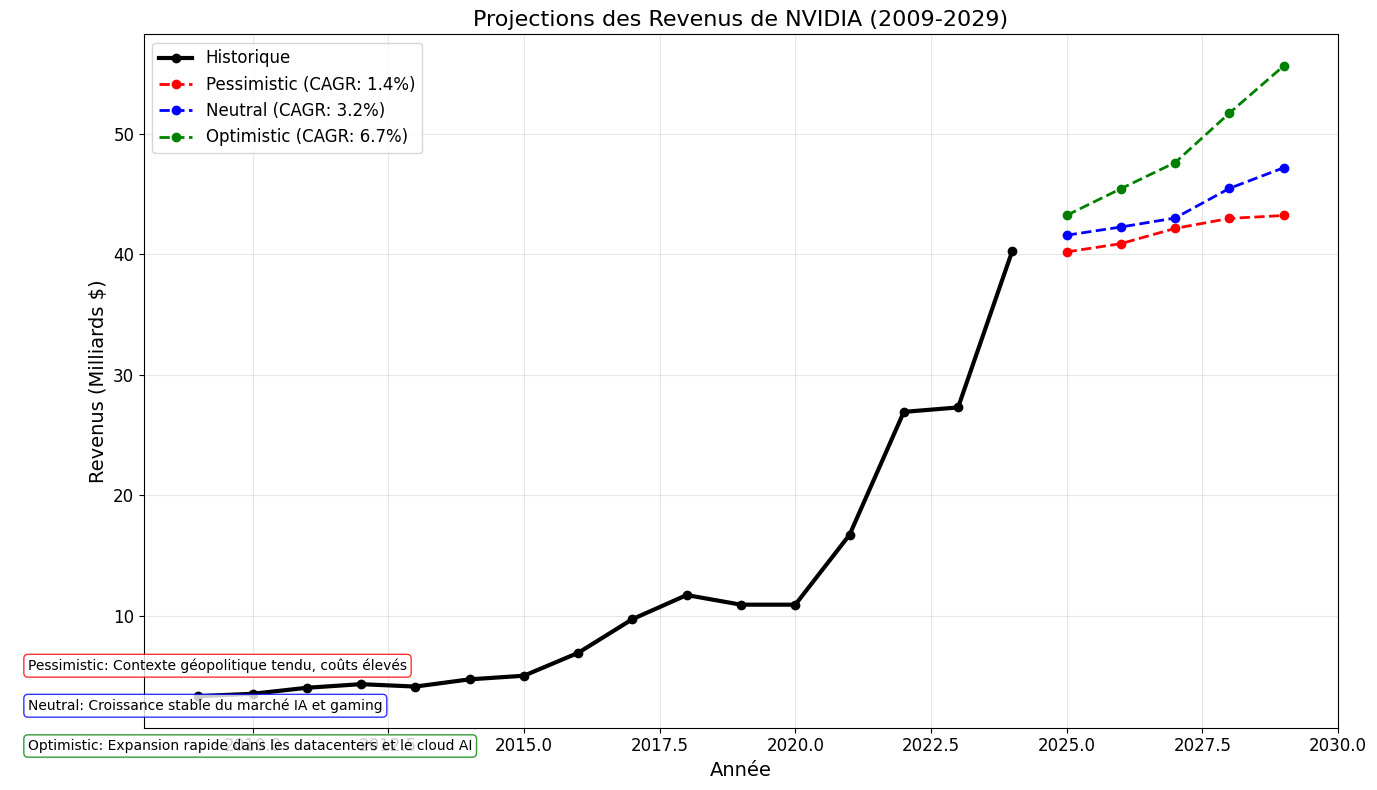

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Données historiques des revenus de NVIDIA en milliards de dollars
historical_revenue = {
    2009: 3.3, 2010: 3.5, 2011: 4.0, 2012: 4.3, 2013: 4.1, 2014: 4.7, 2015: 5.0,
    2016: 6.9, 2017: 9.7, 2018: 11.7, 2019: 10.9, 2020: 10.9, 2021: 16.7,
    2022: 26.91, 2023: 27.28, 2024: 40.30
}

# Convertir en DataFrame
df_historical = pd.DataFrame(list(historical_revenue.items()), columns=['Year', 'Revenue'])
df_historical['Revenue_Type'] = 'Historical'

# Fonction pour générer des projections de revenus
def generate_projections(years_to_project=5):
    current_year = 2024
    projection_years = range(current_year + 1, current_year + years_to_project + 1)

    # Scénarios de croissance
    scenarios = {
        'Pessimistic': {
            'growth_rate': np.linspace(0.01, 0.02, years_to_project),  # 1-2% growth
            'volatility': 0.01,  # Faible volatilité
            'description': 'Contexte géopolitique tendu, coûts élevés'
        },
        'Neutral': {
            'growth_rate': np.linspace(0.03, 0.05, years_to_project),  # 3-5% growth
            'volatility': 0.015,  # Volatilité modérée
            'description': 'Croissance stable du marché IA et gaming'
        },
        'Optimistic': {
            'growth_rate': np.linspace(0.06, 0.08, years_to_project),  # 6-8% growth
            'volatility': 0.02,  # Volatilité plus élevée
            'description': 'Expansion rapide dans les datacenters et le cloud AI'
        }
    }

    # Dernière valeur historique
    latest_revenue = historical_revenue[current_year]

    # Dictionnaire pour stocker les projections
    projections = {}

    # Générer les projections
    for scenario, params in scenarios.items():
        revenues = [latest_revenue]

        for i, year in enumerate(projection_years):
            growth_factor = 1 + params['growth_rate'][i] + np.random.normal(0, params['volatility'])
            new_revenue = revenues[-1] * growth_factor
            revenues.append(new_revenue)

        projections[scenario] = dict(zip(projection_years, revenues[1:]))

    return projections, scenarios

# Générer les projections
projections, scenarios_info = generate_projections()

# Convertir les projections en DataFrame
projection_data = []
for scenario, data in projections.items():
    for year, revenue in data.items():
        projection_data.append([year, revenue, scenario])

df_projections = pd.DataFrame(projection_data, columns=['Year', 'Revenue', 'Revenue_Type'])

# Fusionner les données historiques et les projections
df_combined = pd.concat([df_historical, df_projections])

# Calculer le taux de croissance annuel moyen (CAGR) pour chaque scénario
def calculate_cagr(start_value, end_value, years):
    return (end_value / start_value) ** (1 / years) - 1

cagr_data = {}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    start_year = min(scenario_data['Year'])
    end_year = max(scenario_data['Year'])
    start_value = historical_revenue[2024]
    end_value = scenario_data[scenario_data['Year'] == end_year]['Revenue'].values[0]
    years = end_year - 2024

    cagr = calculate_cagr(start_value, end_value, years)
    cagr_data[scenario] = cagr

# Tracer les projections
plt.figure(figsize=(14, 8))

# Données historiques
historical_years = df_historical['Year']
historical_revenue_values = df_historical['Revenue']
plt.plot(historical_years, historical_revenue_values, 'o-', linewidth=3, color='black', label='Historique')

# Projections par scénario
colors = {'Pessimistic': 'red', 'Neutral': 'blue', 'Optimistic': 'green'}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    plt.plot(scenario_data['Year'], scenario_data['Revenue'], 'o--', linewidth=2,
             color=colors[scenario], label=f"{scenario} (CAGR: {cagr_data[scenario]:.1%})")

plt.title('Projections des Revenus de NVIDIA (2009-2029)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Revenus (Milliards $)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajouter une annotation des scénarios
y_pos = max(df_combined['Revenue']) * 0.7
for i, (scenario, info) in enumerate(scenarios_info.items()):
    plt.annotate(f"{scenario}: {info['description']}",
                 xy=(0.02, 0.15 - i * 0.05),
                 xycoords='figure fraction',
                 fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[scenario], alpha=0.8))

# Afficher le graphique
plt.tight_layout()
plt.show()


In [3]:
# Fusionner les données historiques et les scénarios en un seul tableau avec les années en colonnes et les variables en lignes

# Création du tableau consolidé
data_combined = {
    "Variables": ["Revenue (Billion $)", "Cost of Goods Sold (Billion $)", "Net Income (Billion $)"],
    "2022": [26.91, 9.439, 9.752],
    "2023": [27.28, 11.618, 4.368],
    "2024": [40.30, 16.621, 29.760],
    "2025 Pessimistic": [60.00, 30.00, 25.00],
    "2025 Neutral": [76.00, 32.64, 72.88],
    "2025 Optimistic": [90.00, 35.00, 85.00]
}

# Création du DataFrame
df_combined = pd.DataFrame(data_combined)

# Affichage du tableau consolidé
tools.display_dataframe_to_user(name="NVIDIA Financial Data (2022-2025 Scenarios)", dataframe=df_combined)


NameError: name 'tools' is not defined

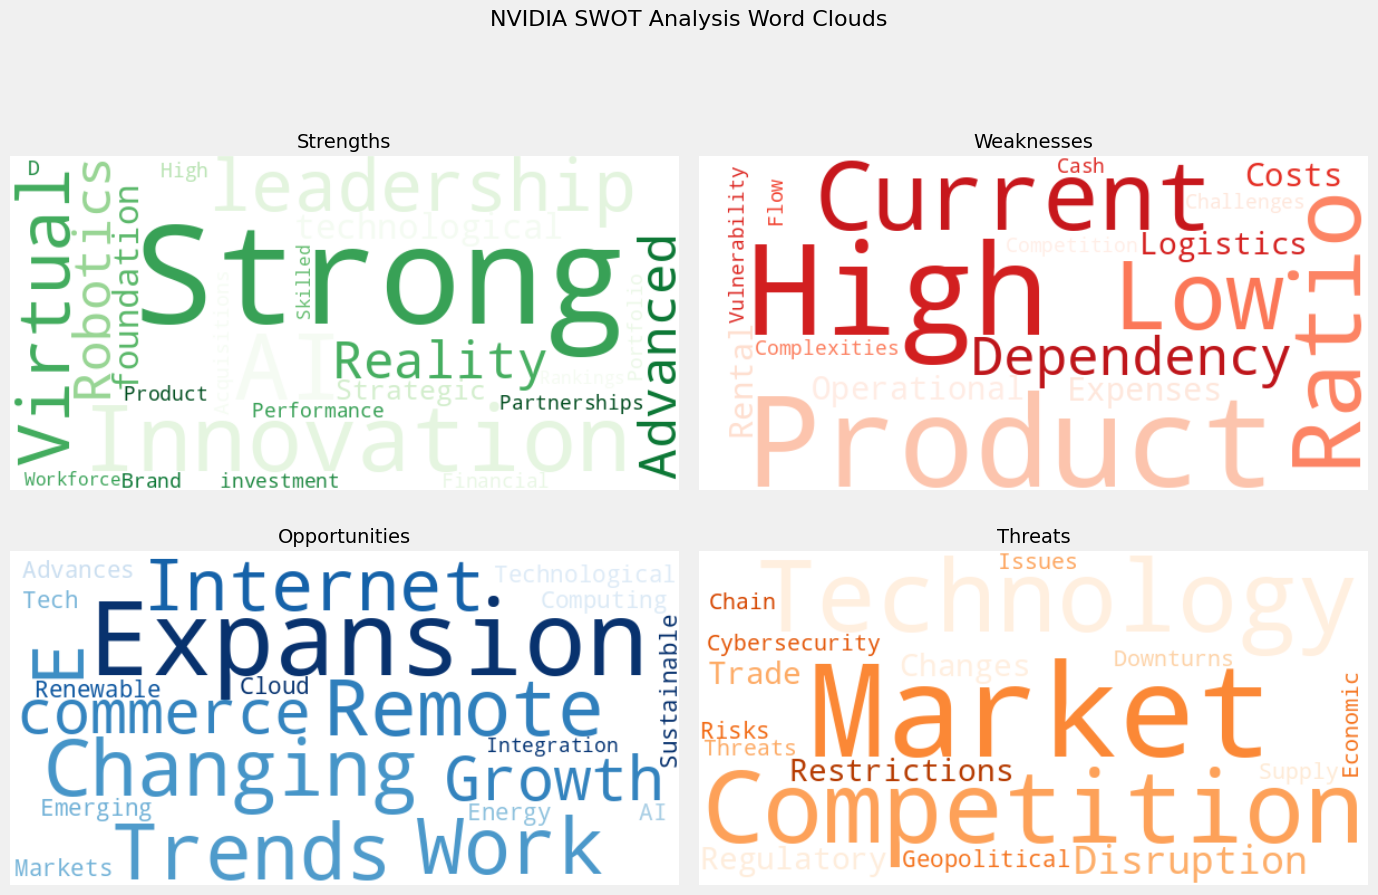

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dictionnaire adapté pour le SWOT de NVIDIA
swot_nvidia = {
    "Strengths": "Innovation, AI leadership, Virtual Reality, Advanced Robotics, Strong technological foundation, Strategic Partnerships, Acquisitions, Strong Product Portfolio, R&D investment, Financial Performance, Strong Brand, High Rankings, Skilled Workforce",
    "Weaknesses": "Low Current Ratio, Dependency on few products, High Operational Costs, Rental Expenses, Logistics Complexities, High Competition, Product Vulnerability, Cash Flow Challenges",
    "Opportunities": "Changing Trends, Remote Work, Internet Expansion, E-commerce Growth, Technological Advances, Emerging Markets, Cloud Computing, AI Expansion, Sustainable Tech, Renewable Energy Integration",
    "Threats": "Market Competition, Technology Disruption, Regulatory Changes, Trade Restrictions, Geopolitical Risks, Cybersecurity Threats, Economic Downturns, Supply Chain Issues"
}

# Paramètres des couleurs pour chaque catégorie
swot_colors = {
    "Strengths": "Greens",
    "Weaknesses": "Reds",
    "Opportunities": "Blues",
    "Threats": "Oranges"
}

# Création des WordClouds pour chaque catégorie
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("NVIDIA SWOT Analysis Word Clouds", fontsize=16)

for ax, (category, text) in zip(axes.flatten(), swot_nvidia.items()):
    wordcloud = WordCloud(width=600, height=300, background_color='white', colormap=swot_colors[category]).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(category, fontsize=14)
    ax.axis("off")

# Affichage des WordClouds
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()